<a href="https://colab.research.google.com/github/me-t1me/DIP_assignment_2/blob/master/DIP_2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
from google.colab.patches import cv2_imshow

In [2]:
!wget "https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray_g.png"
!wget "https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray.png"

--2023-04-23 10:56:58--  https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray_g.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419522 (410K) [image/png]
Saving to: ‘xray_g.png’

xray_g.png          100%[===================>] 409.69K  --.-KB/s    in 0.04s   

2023-04-23 10:56:58 (11.2 MB/s) - ‘xray_g.png’ saved [419522/419522]

--2023-04-23 10:56:59--  https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 369053 (360K) [image/png]
Saving to:

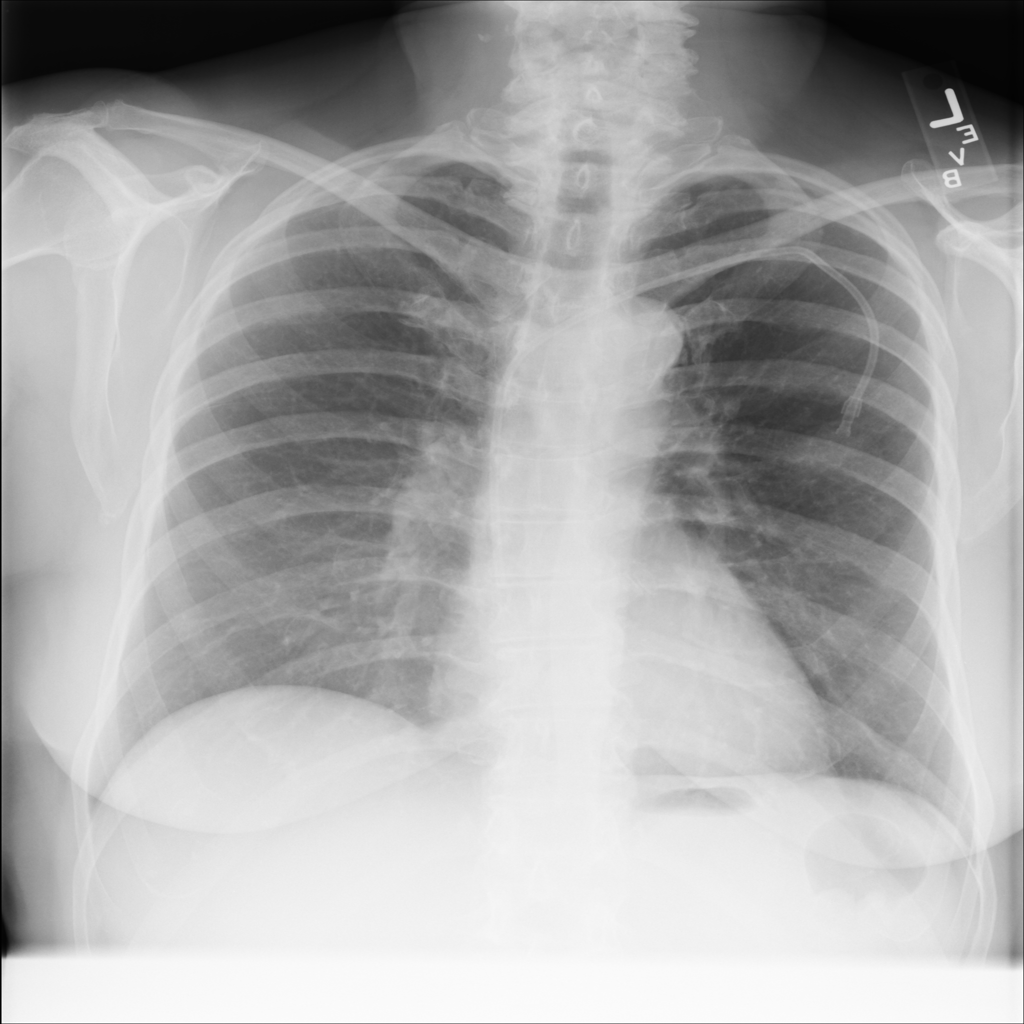

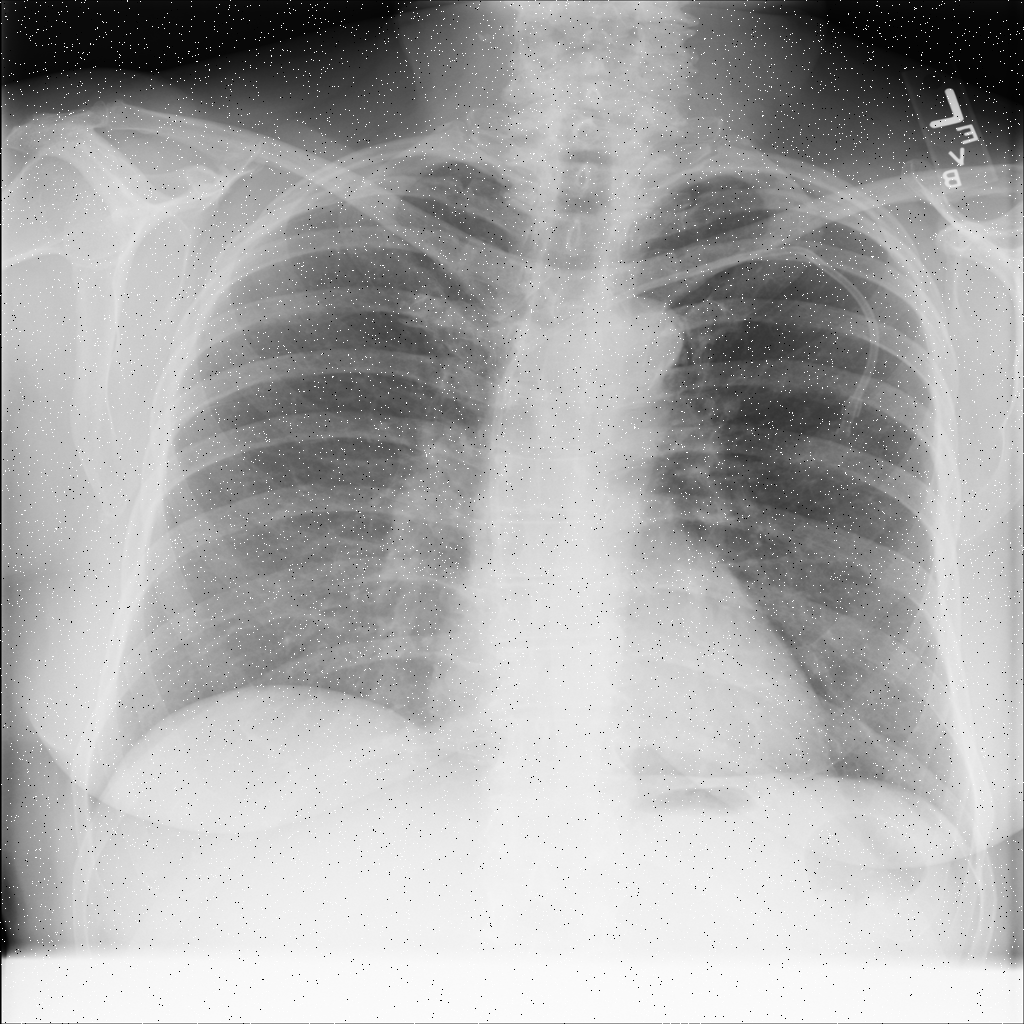

In [3]:
# Load the original X-ray image
img = cv2.imread('xray.png', 0)

# Load the Gaussian noise-based contaminated X-ray image
img_g = cv2.imread('xray_g.png', 0)
cv2_imshow(img)
cv2_imshow(img_g)

In [6]:
# Apply frequency domain box filter to the contaminated X-ray image
img_box = cv2.boxFilter(img_g, -1, (5, 5), normalize=False)

# Apply frequency domain Gaussian filter to the contaminated X-ray image
img_gaussian = cv2.GaussianBlur(img_g, (5, 5), 0)

# Apply frequency domain Butterworth low-pass filter to the contaminated X-ray image/
rows, cols = img_g.shape
crow, ccol = rows // 2, cols // 2
d_0 = 50  # Cut-off frequency
order = 2  # Order of the Butterworth filter

butterworth_lp = np.zeros((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        butterworth_lp[i, j] = 1 / (1 + (distance / d_0) ** (2 * order))
butterworth_lp = cv2.dft(butterworth_lp, flags=cv2.DFT_COMPLEX_OUTPUT)

img_butterworth = cv2.dft(img_g.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
img_butterworth = cv2.mulSpectrums(img_butterworth, butterworth_lp, 0)
img_butterworth = cv2.idft(img_butterworth, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
img_butterworth = img_butterworth.astype(img.dtype)

# Evaluate the SNR and RMSE values for the filtered images using the original X-ray image as a reference
snr_box = psnr(img, img_box)
rmse_box = np.sqrt(mse(img, img_box))

snr_gaussian = psnr(img, img_gaussian)
rmse_gaussian = np.sqrt(mse(img, img_gaussian))

snr_butterworth = psnr(img, img_butterworth)
rmse_butterworth = np.sqrt(mse(img, img_butterworth))

print("SNR Box filter: ", snr_box)
print("RMSE Box filter: ", rmse_box)

print("SNR Gaussian filter: ", snr_gaussian)
print("RMSE Gaussian filter: ", rmse_gaussian)

print("SNR Butterworth filter: ", snr_butterworth)
print("RMSE Butterworth filter: ", rmse_butterworth)


SNR Box filter:  7.899860147135649
RMSE Box filter:  102.69449723980435
SNR Gaussian filter:  32.44598106736325
RMSE Gaussian filter:  6.084727410610765
SNR Butterworth filter:  7.683601525866931
RMSE Butterworth filter:  105.28344912226473
